In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

В качестве примера рассмотрим потребительские расходы (в среднем на члена 
домашнего хозяйств 
в мес руб.) на здравоохранение по регионам России за 2022 и 2023 года.б.Источник данных: Росстат, Приложение 1. "Доходы, расходы и потребление домашних хозяйств по субъектам 
Российской Федераци", лист 1.4и, https://rosstat.gov.ru/storage/mediabank/Dohod_rashod_potreblen_3k-2023.htm

In [2]:
data = pd.read_excel("HW_example_data.xlsx", sheet_name = "Data")
print(data)

                      Unnamed: 0  expense_3q2022  expense_3q2023  \
0           Белгородская область       21914.398       25241.122   
1               Брянская область       18265.001       19635.899   
2           Владимирская область       19813.828       23137.913   
3            Воронежская область       17621.889       19502.166   
4             Ивановская область       21681.452       23090.981   
..                           ...             ...             ...   
77              Амурская область       19586.108       21720.673   
78           Магаданская область       36153.698       64866.434   
79           Сахалинская область       32652.890       32761.952   
80  Еврейская автономная область       21690.199       25686.048   
81    Чукотский автономный округ       34444.050       29854.794   

    healthP_3q2022  healthP_3q2023  health_3q2022  health_3q2023  
0         2.568850        2.994974        562.948        755.965  
1         2.933966        3.079054        535.889

In [3]:
data = data.rename(columns={'Unnamed: 0': 'region'})
print(data)

                          region  expense_3q2022  expense_3q2023  \
0           Белгородская область       21914.398       25241.122   
1               Брянская область       18265.001       19635.899   
2           Владимирская область       19813.828       23137.913   
3            Воронежская область       17621.889       19502.166   
4             Ивановская область       21681.452       23090.981   
..                           ...             ...             ...   
77              Амурская область       19586.108       21720.673   
78           Магаданская область       36153.698       64866.434   
79           Сахалинская область       32652.890       32761.952   
80  Еврейская автономная область       21690.199       25686.048   
81    Чукотский автономный округ       34444.050       29854.794   

    healthP_3q2022  healthP_3q2023  health_3q2022  health_3q2023  
0         2.568850        2.994974        562.948        755.965  
1         2.933966        3.079054        535.889

In [4]:
#number of observations in each year
n = len(data)
n

82

(array([ 6.,  0.,  8., 12., 14., 23.,  5.,  8.,  3.,  0.,  0.,  1.,  0.,
         0.,  2.]),
 array([ 205.33      ,  341.61913333,  477.90826667,  614.1974    ,
         750.48653333,  886.77566667, 1023.0648    , 1159.35393333,
        1295.64306667, 1431.9322    , 1568.22133333, 1704.51046667,
        1840.7996    , 1977.08873333, 2113.37786667, 2249.667     ]),
 <BarContainer object of 15 artists>)

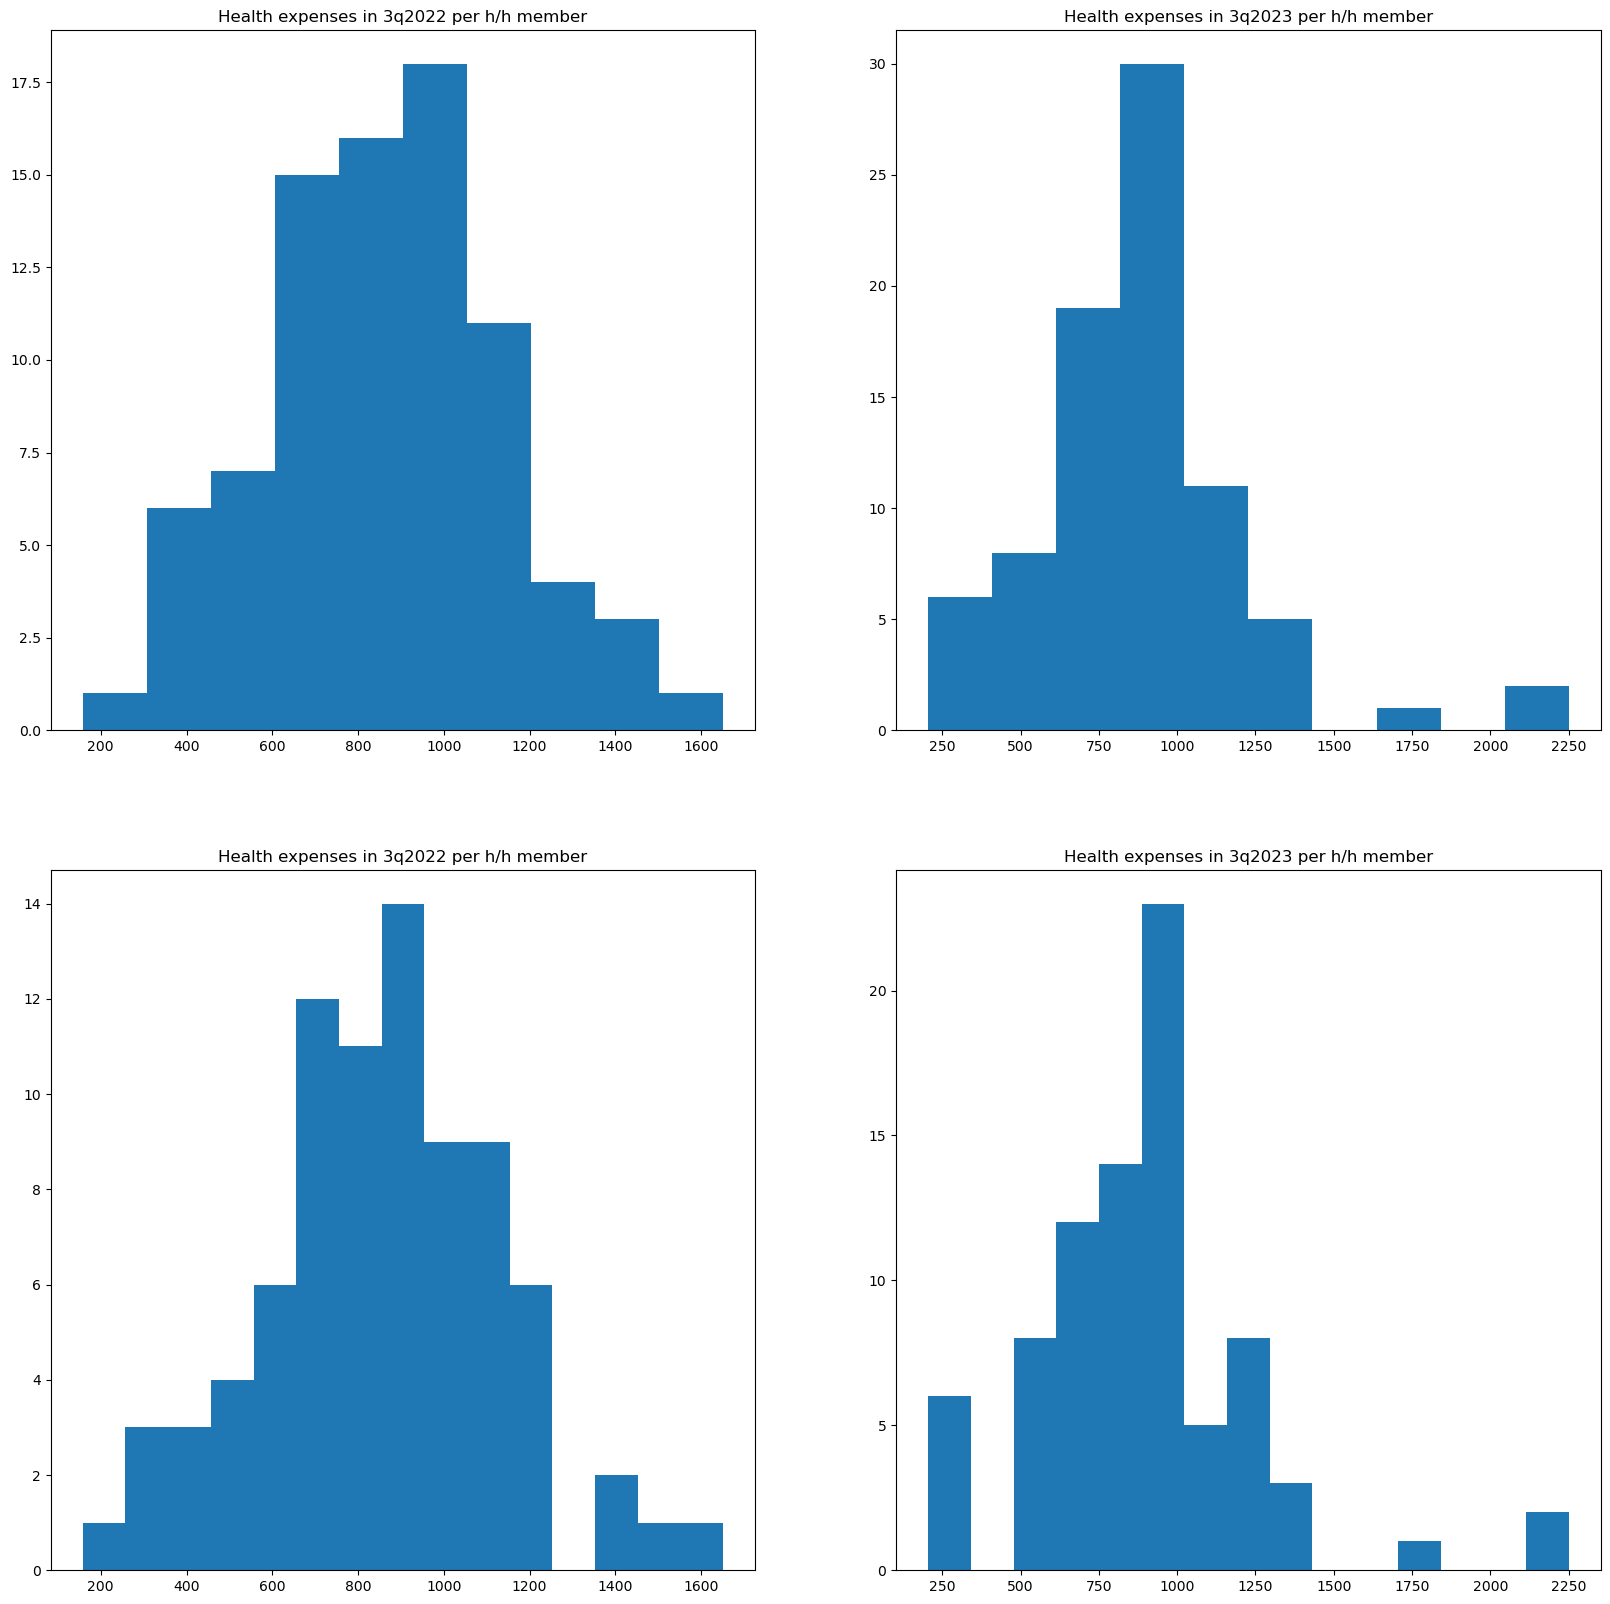

In [5]:
fig, ax = plt.subplots(2,2, figsize=(20,20))
ax[0,0].set_title('Health expenses in 3q2022 per h/h member')
ax[0,0].hist(data.health_3q2022)
ax[0,1].set_title('Health expenses in 3q2023 per h/h member')
ax[0,1].hist(data.health_3q2023)
ax[1,0].set_title('Health expenses in 3q2022 per h/h member')
ax[1,0].hist(data.health_3q2022, bins = 15)
ax[1,1].set_title('Health expenses in 3q2023 per h/h member')
ax[1,1].hist(data.health_3q2023, bins = 15)




In [6]:
data['ln_health_3q2022'] = np.log(data.health_3q2022)
data['ln_health_3q2023'] = np.log(data.health_3q2023)
print(data)

                          region  expense_3q2022  expense_3q2023  \
0           Белгородская область       21914.398       25241.122   
1               Брянская область       18265.001       19635.899   
2           Владимирская область       19813.828       23137.913   
3            Воронежская область       17621.889       19502.166   
4             Ивановская область       21681.452       23090.981   
..                           ...             ...             ...   
77              Амурская область       19586.108       21720.673   
78           Магаданская область       36153.698       64866.434   
79           Сахалинская область       32652.890       32761.952   
80  Еврейская автономная область       21690.199       25686.048   
81    Чукотский автономный округ       34444.050       29854.794   

    healthP_3q2022  healthP_3q2023  health_3q2022  health_3q2023  \
0         2.568850        2.994974        562.948        755.965   
1         2.933966        3.079054        535.8

(array([ 2.,  2.,  2.,  0.,  0.,  1.,  8.,  7., 17., 24.,  7.,  8.,  1.,
         1.,  2.]),
 array([5.32461844, 5.48421304, 5.64380765, 5.80340225, 5.96299685,
        6.12259146, 6.28218606, 6.44178066, 6.60137526, 6.76096987,
        6.92056447, 7.08015907, 7.23975368, 7.39934828, 7.55894288,
        7.71853748]),
 <BarContainer object of 15 artists>)

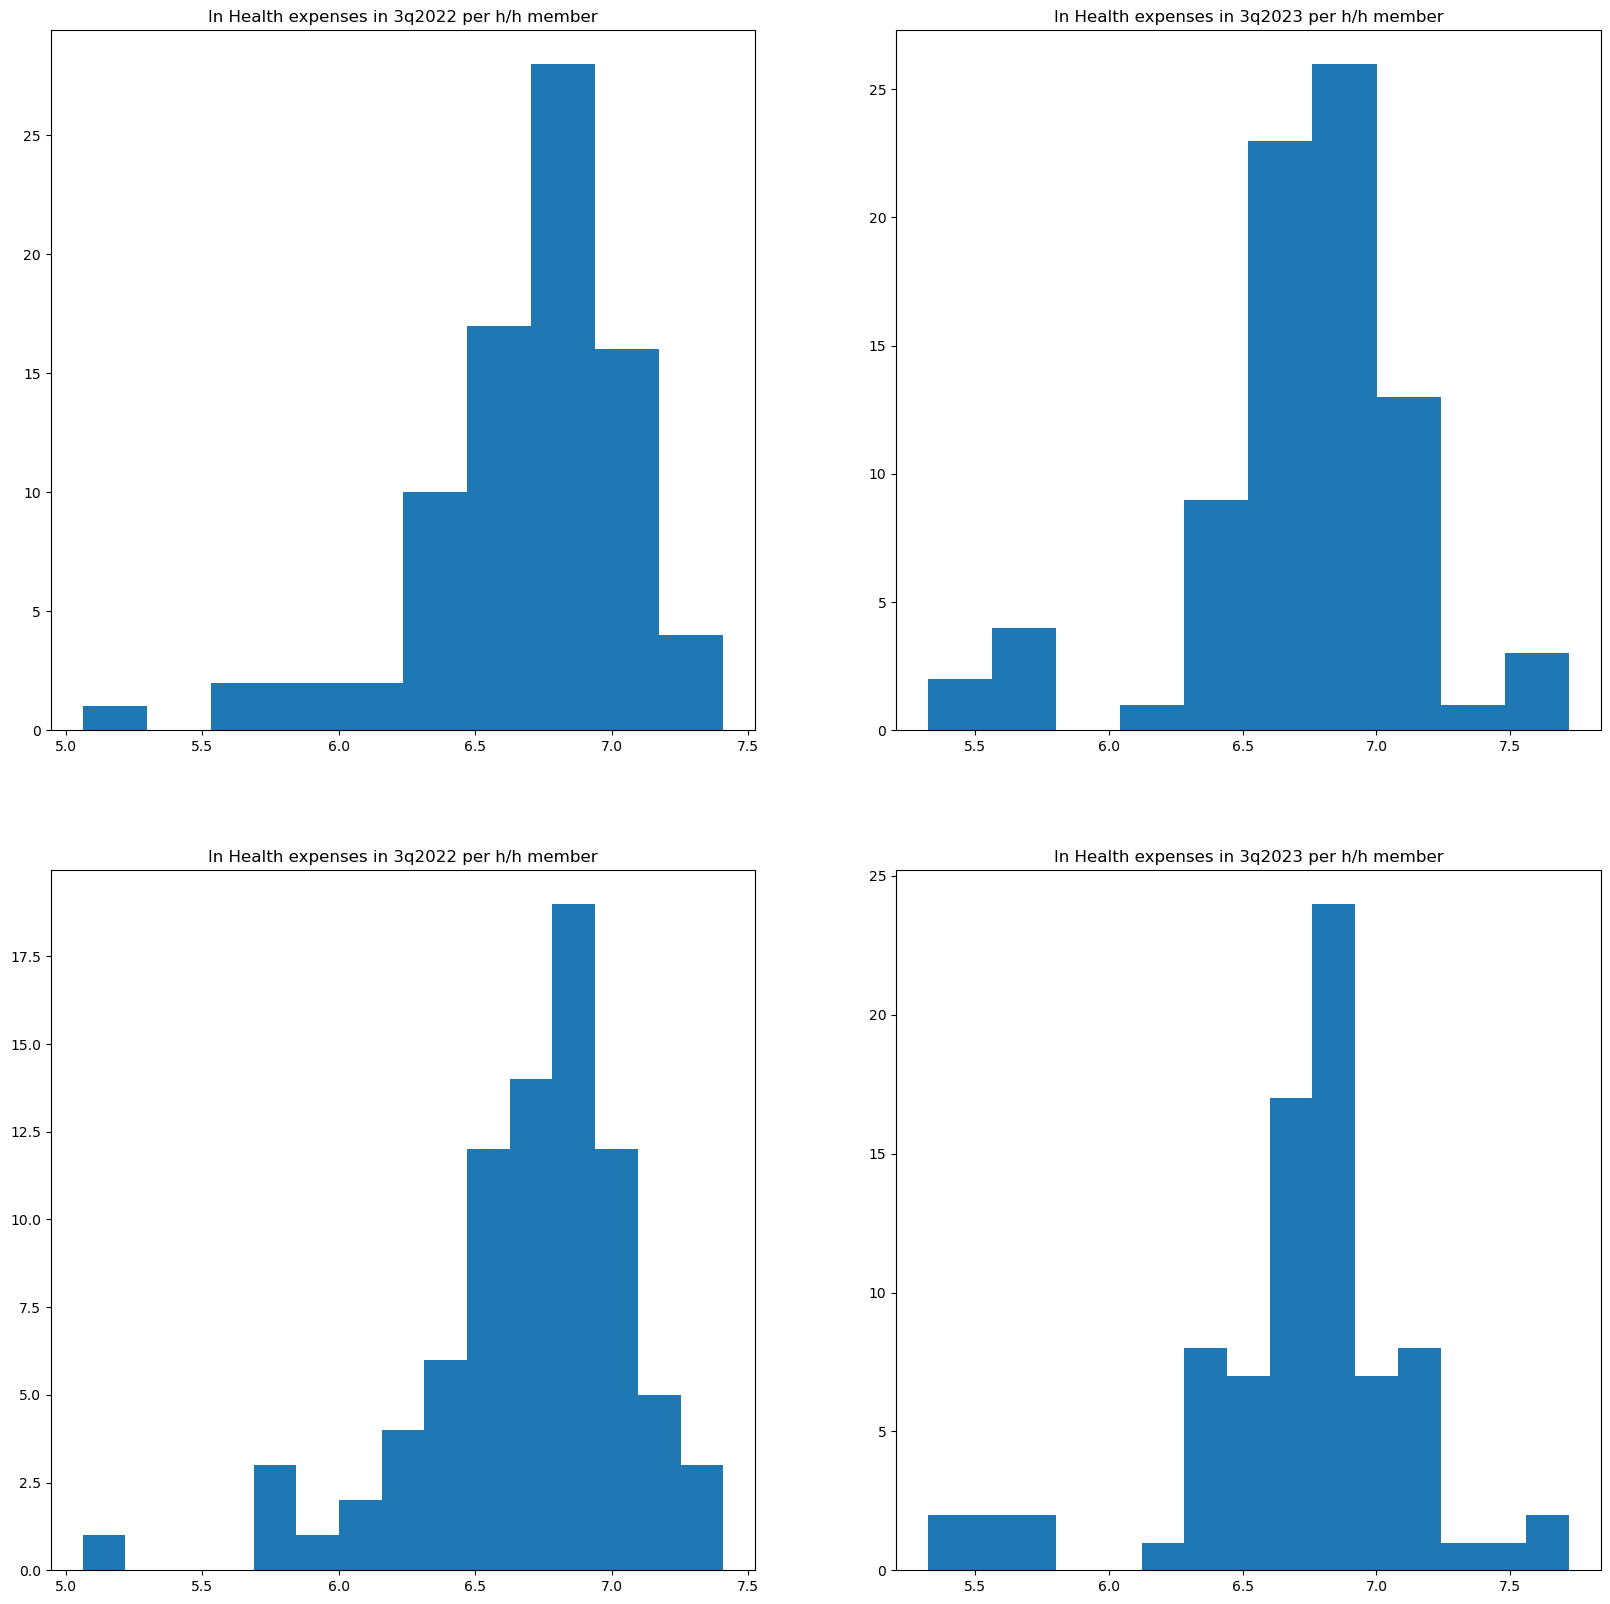

In [7]:
fig, ax = plt.subplots(2,2, figsize=(20,20))
ax[0,0].set_title('ln Health expenses in 3q2022 per h/h member')
ax[0,0].hist(data.ln_health_3q2022)
ax[0,1].set_title('ln Health expenses in 3q2023 per h/h member')
ax[0,1].hist(data.ln_health_3q2023)
ax[1,0].set_title('ln Health expenses in 3q2022 per h/h member')
ax[1,0].hist(data.ln_health_3q2022, bins = 15)
ax[1,1].set_title('ln Health expenses in 3q2023 per h/h member')
ax[1,1].hist(data.ln_health_3q2023, bins = 15)

In [8]:
#Method of moments

mean2022 = np.mean(data.health_3q2022)
sample_variance2022_ub = np.var(data.health_3q2022, ddof = 1) #unbiased variance, ddof = degrees of freedom
sample_variance2022_b = np.var(data.health_3q2022, ddof = 0) #biased variance

mean2023 = np.mean(data.health_3q2023)
sample_variance2023_ub = np.var(data.health_3q2023, ddof = 1)
sample_variance2023_b = np.var(data.health_3q2023, ddof = 0)

print('health 3q2022 mean is', round(mean2022,2),
     'health 3q2022 unbiased sample variance is', round(sample_variance2022_ub, 2), 
      'health 3q2022 biased sample variance is', round(sample_variance2022_b, 2), 
     '\nhealth 3q2023 mean is', round(mean2023,2),
     'health 3q2023 unbiased sample variance is', round(sample_variance2023_ub, 2),
     'health 3q2023 biased sample variance is', round(sample_variance2023_b, 2), )

health 3q2022 mean is 862.43 health 3q2022 unbiased sample variance is 76571.87 health 3q2022 biased sample variance is 75638.07 
health 3q2023 mean is 896.12 health 3q2023 unbiased sample variance is 121458.8 health 3q2023 biased sample variance is 119977.59


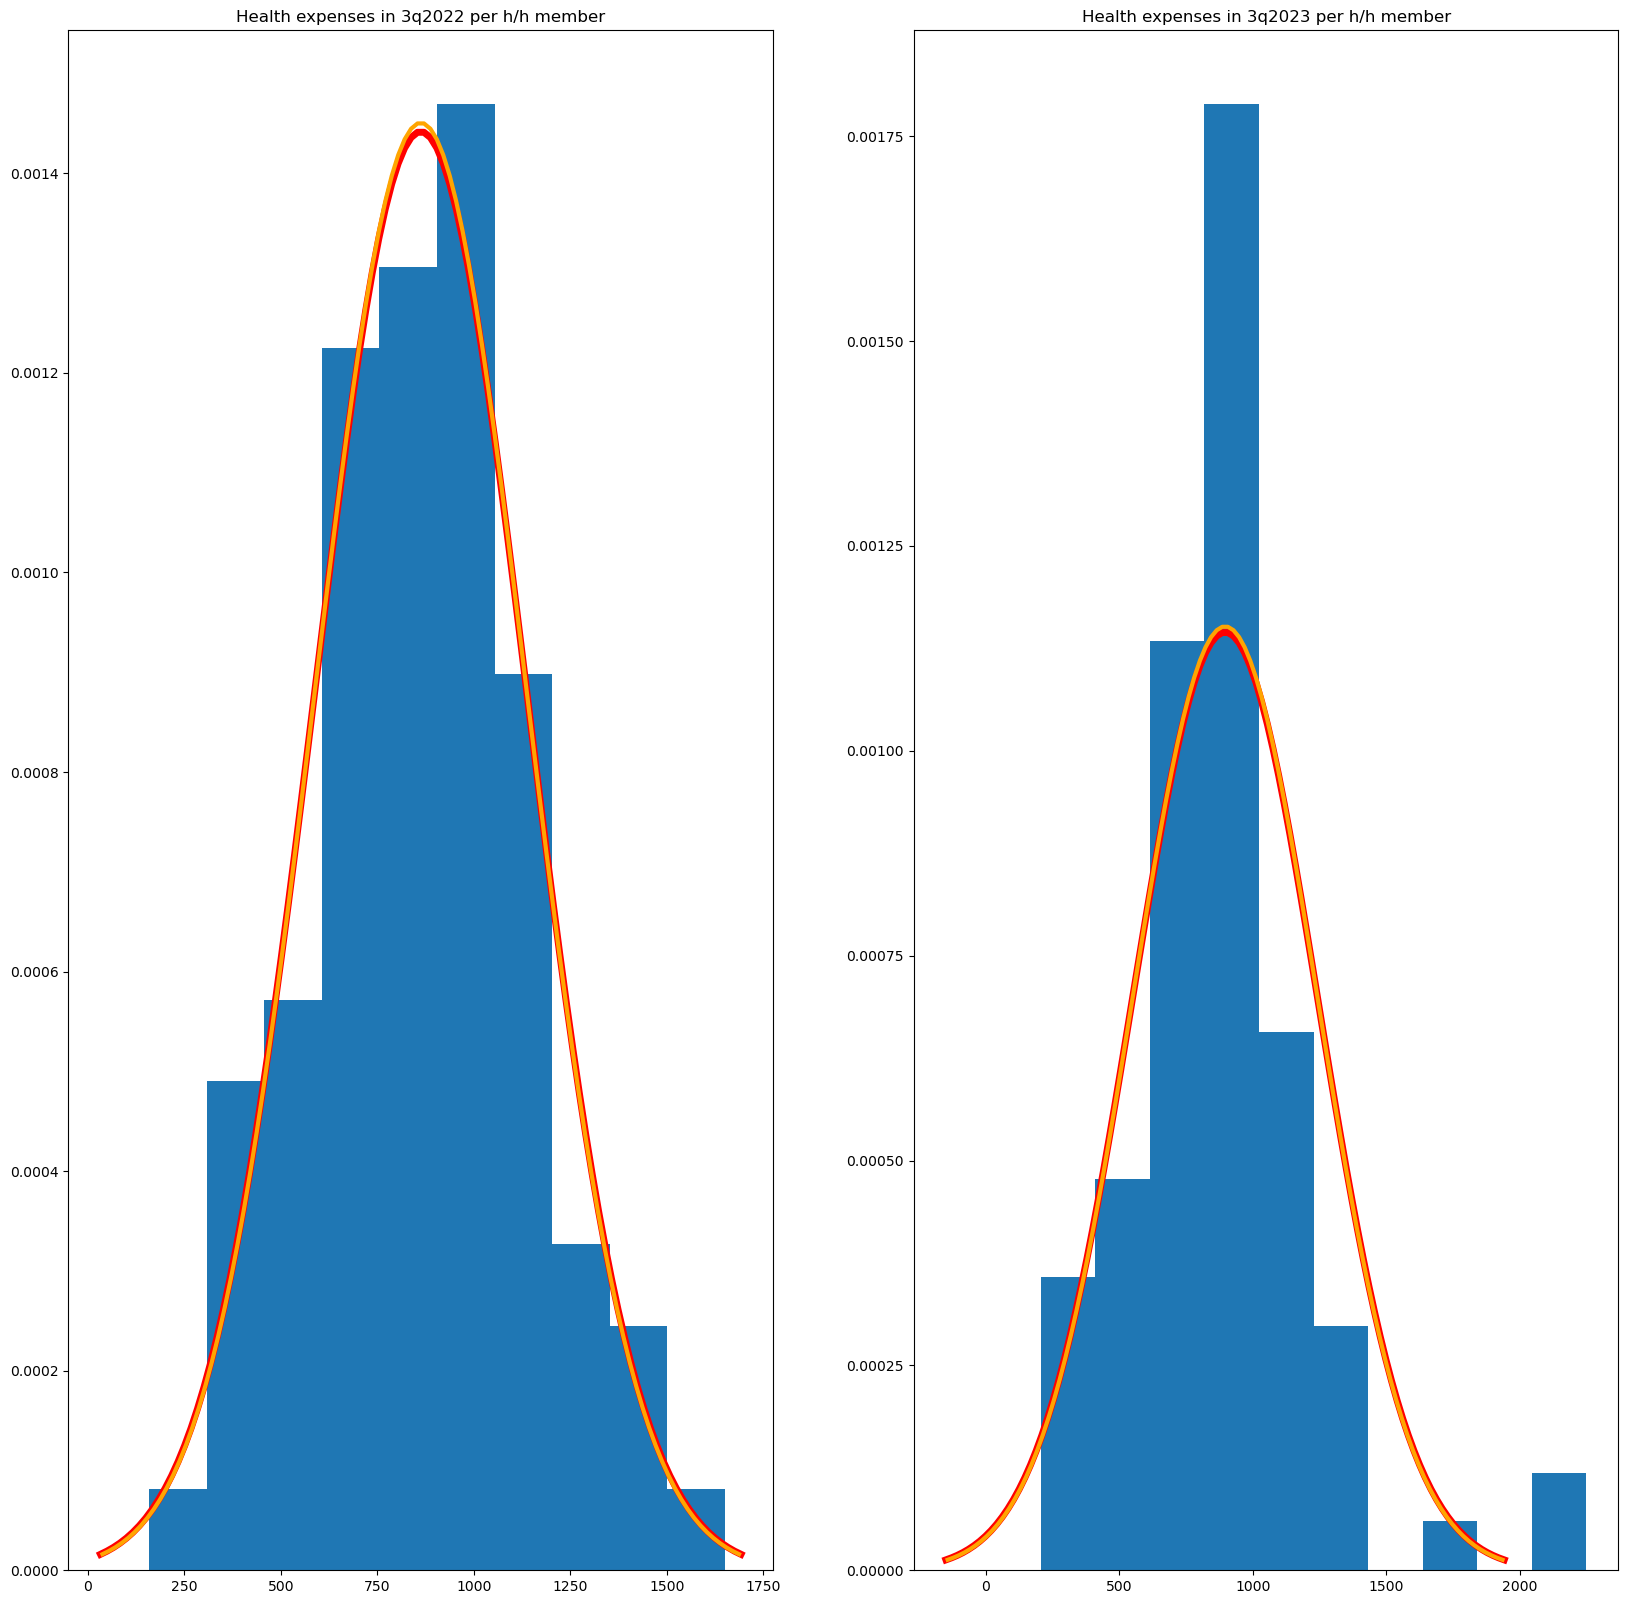

In [9]:
x2022 = np.linspace(mean2022 - 3*np.sqrt(sample_variance2022_ub), mean2022 + 3*np.sqrt(sample_variance2022_ub), 100)
x2023 = np.linspace(mean2023 - 3*np.sqrt(sample_variance2023_ub), mean2023 + 3*np.sqrt(sample_variance2023_ub), 100)

x2022_b = np.linspace(mean2022 - 3*np.sqrt(sample_variance2022_b), mean2022 + 3*np.sqrt(sample_variance2022_b), 100)
x2023_b = np.linspace(mean2023 - 3*np.sqrt(sample_variance2023_b), mean2023 + 3*np.sqrt(sample_variance2023_b), 100)


fig, ax = plt.subplots(1,2, figsize=(20,20))
ax[0].set_title('Health expenses in 3q2022 per h/h member')
ax[0].hist(data.health_3q2022, density = True)
ax[0].plot(x2022, stats.norm.pdf(x2022, mean2022, np.sqrt(sample_variance2022_ub)), color = 'red', linewidth = 5)

ax[1].set_title('Health expenses in 3q2023 per h/h member')
ax[1].hist(data.health_3q2023, density = True)
ax[1].plot(x2023, stats.norm.pdf(x2023, mean2023, np.sqrt(sample_variance2023_ub)), color = 'red', linewidth = 5)


ax[0].plot(x2022_b, stats.norm.pdf(x2022_b, mean2022, np.sqrt(sample_variance2022_b)), color = 'orange', linewidth = 3)

ax[1].plot(x2023_b, stats.norm.pdf(x2023_b, mean2023, np.sqrt(sample_variance2023_b)), color = 'orange', linewidth = 3)


In [20]:
#Maximum Likelihood Estimation (MLE) Method 

distribution = stats.norm
data_mle = data.health_3q2022
bounds = [(-10000, 10000), (0, 1000000)] #set parameter bounds

mle = stats.fit(distribution, data_mle , bounds, method = 'mle') #mle is set by default

print('mle results', mle,
      '\nmean', np.mean(data_mle),
      '\nvariance_ub', np.var(data_mle, ddof = 1),
      '\nstdev_ub', np.sqrt(np.var(data_mle, ddof = 1)),
      '\nvariance_b', np.var(data_mle, ddof = 0),
      '\nstdev_b', np.sqrt(np.var(data_mle, ddof = 0)))

mle results   params: FitParams(loc=862.4337978326591, scale=275.02291263108833)
 success: True
 message: 'Optimization terminated successfully.' 
mean 862.4337195121951 
variance_ub 76571.87032499441 
stdev_ub 276.71622707205734 
variance_b 75638.06702834814 
stdev_b 275.0237572071695


In [11]:
##Confidence interval for mean
#Variance is known, var = 120 000

def ci_mean_z(data, confidence_level, sigma2):
    mean = np.mean(data)
    stdev = np.sqrt(sigma2)
    n = len(data)
    z_quantile = stats.norm.ppf(confidence_level + (1 - confidence_level)/2)

    lower_bound = mean - z_quantile * stdev / np.sqrt(n)
    upper_bound = mean + z_quantile * stdev / np.sqrt(n)

    return print('confidence interval is', lower_bound, upper_bound,
                 '\nconfidence level is', confidence_level,
                 '\nz_quantile is', z_quantile)

ci_mean_z(data.health_3q2022, 0.95, 120000)

confidence interval is 787.4560758130608 937.4113632113294 
confidence level is 0.95 
z_quantile is 1.959963984540054


In [12]:
#Confidence interval for mean using statsmodels
#Variance is known, var = 120 000

ci_z = stats.norm.interval(confidence = 0.95, loc = np.mean(data.health_3q2022), scale = np.sqrt(120000)/np.sqrt(len(data)))

print('confidence interval is', ci_z)


confidence interval is (787.4560758130608, 937.4113632113294)


In [13]:
#Confidence interval for mean
#Unknown Variance

def ci_mean_t(data, confidence_level):
    mean = np.mean(data)
    stdev = np.sqrt(np.var(data, ddof = 1))
    n = len(data)
    t_quantile = stats.t.ppf(confidence_level + (1 - confidence_level)/2, df = n - 1)

    lower_bound = mean - t_quantile * stdev / np.sqrt(n)
    upper_bound = mean + t_quantile * stdev / np.sqrt(n)

    return print('confidence interval is', lower_bound, upper_bound,
                 '\nconfidence level is', confidence_level,
                 '\nt_quantile is', t_quantile)

ci_mean_t(data.health_3q2022, 0.95)

confidence interval is 801.6324963697044 923.2349426546858 
confidence level is 0.95 
t_quantile is 1.9896863232444828


In [15]:
#Confidence interval for mean using statsmodels
#Unknown Variance

ci_t = stats.t.interval(confidence = 0.95, 
                        df = len(data.health_3q2022) - 1, 
                        loc = np.mean(data.health_3q2022), 
                        scale = np.sqrt(np.var(data.health_3q2022, ddof = 1))/np.sqrt(len(data)))

print('confidence interval is', ci_t)

confidence interval is (801.6324963697044, 923.2349426546858)


In [ ]:
#Confidence interval for mean difference. Unknown but equal variances.

def ci_meandiff_uknown_eqvar(data_x, data_y, confidence_level):
    
            # X sample
            mean_x = np.mean(data_x)
            stdev_x = np.sqrt(np.var(data_x, ddof = 1))
            n_x = len(data_x)
    
            # Y sample
            mean_y = np.mean(data_y)
            stdev_y = np.sqrt(np.var(data_y, ddof = 1))
            n_y = len(data_y)
    
            # X + Y Variance
            s2 = ((n_x - 1) * stdev_x**2 + (n_y - 1) * stdev_y**2) / (n_x + n_y - 2)
    
            t_quantile = stats.t.ppf(confidence_level + (1 - confidence_level)/2, df = n_x + n_y - 2)
    
            # Confidence interval
            lower_bound = mean_x - mean_y - t_quantile * np.sqrt(s2) * np.sqrt((n_x + n_y) / (n_x * n_y))
            upper_bound = mean_x - mean_y + t_quantile * np.sqrt(s2) * np.sqrt((n_x + n_y) / (n_x * n_y))

            return print('conf_level is', conf_level,
                         '\nt_quantile is', t_quantile,
                         '\nconfidence interval is', lower_bound, upper_bound)

ci_meandiff_uknown_eqvar(data.health_3q2022, data.health_3q2023, 0.95)

In [ ]:
#Hypothesis testing, mean with known variance

def hyp_mean_z(data, mu, sigma2, alpha):
    mean = np.mean(data)
    stdev = np.sqrt(sigma2)
    n = len(data)
    
    T_obs = (mean - mu) / (stdev/np.sqrt(n))

    if T_obs < 0:
        p_value = stats.norm.cdf(T_obs)
    else:
        p_value = 1 - stats.norm.cdf(T_obs)
        
    p_value_lhs = stats.norm.cdf(T_obs)
    p_value_rhs = 1 - stats.norm.cdf(T_obs)
    
    crit_value_2s = stats.norm.ppf(1 - alpha/2) #two-sided alternative
    crit_value_lhs = stats.norm.ppf(alpha)      #left-sided alternative
    crit_value_rhs = stats.norm.ppf(1 - alpha)  #right-sided alternative

    x = np.linspace(-4.5, 4.5, 1000)
    y = stats.norm.pdf(x, loc = 0, scale = 1)
    fig, ax = plt.subplots(1, 3, figsize = (20, 5))
    ax[0].set_title('two-sided alternative')
    ax[0].plot(x , y)
    ax[0].vlines(x = crit_value_2s, ymin = 0, ymax = stats.norm.pdf(crit_value_2s), linestyles = 'dashed', color = 'green')
    ax[0].vlines(x = -crit_value_2s, ymin = 0, ymax = stats.norm.pdf(crit_value_2s), linestyles = 'dashed', color = 'green')
    ax[0].fill_between(x, 0, y, where=(np.array(x) > min(x)) & (np.array(x) <= -crit_value_2s), facecolor='lightgreen')
    ax[0].fill_between(x, 0, y, where=(np.array(x) > crit_value_2s) & (np.array(x) <= max(x)), facecolor='lightgreen')
    ax[0].text(2.75, 0.02, '2.5%')
    ax[0].text(-3.25, 0.02, '2.5%')
    ax[0].text(T_obs - 0.5, -0.015, 'T_obs', fontsize = 9, color = 'red')
    ax[0].vlines(x = T_obs, ymin = 0, ymax = 0.05, linestyles = 'dashed', color = 'red')

    ax[1].set_title('left-sided alternative')
    ax[1].plot(x , y)
    ax[1].vlines(x = crit_value_lhs, ymin = 0, ymax = stats.norm.pdf(crit_value_lhs), linestyles = 'dashed', color = 'green')
    ax[1].fill_between(x, 0, y, where=(np.array(x) > min(x)) & (np.array(x) <= crit_value_lhs), facecolor='lightgreen')
    ax[1].text(-3.25, 0.02, '2.5%')
    ax[1].text(T_obs - 0.5, -0.015, 'T_obs', fontsize = 9, color = 'red')
    ax[1].vlines(x = T_obs, ymin = 0, ymax = 0.05, linestyles = 'dashed', color = 'red')

    ax[2].set_title('right-sided alternative')
    ax[2].plot(x , y)
    ax[2].vlines(x = crit_value_rhs, ymin = 0, ymax = stats.norm.pdf(crit_value_rhs), linestyles = 'dashed', color = 'green')
    ax[2].fill_between(x, 0, y, where=(np.array(x) > crit_value_rhs) & (np.array(x) <= max(x)), facecolor='lightgreen')
    ax[2].text(2.75, 0.02, '2.5%')
    ax[2].text(T_obs - 0.5, -0.015, 'T_obs', fontsize = 9, color = 'red')
    ax[2].vlines(x = T_obs, ymin = 0, ymax = 0.05, linestyles = 'dashed', color = 'red')

    return print('H_0: mu =', mu,
                 '\nObserved statistic', T_obs,
                 '\nH_A: mu !=', mu,
                 '\ncrit_value_2s =', crit_value_2s,
                 '\nalpha/2 =', alpha/2,
                 '\np-value =', round(p_value, 2),
                 '\nH_a: mu <', mu,
                 '\ncrit_value_lhs =', crit_value_lhs,
                 '\nalpha =', alpha,
                 '\np-value =', round(p_value_lhs, 2),
                 '\nH_a: mu >', mu,
                 '\ncrit_value_rhs =', crit_value_rhs,
                 '\nalpha =', alpha,
                 '\np-value =', round(p_value_rhs, 2))
                 
hyp_mean_z(data.health_3q2022, 1000, 120000, 0.05)

In [ ]:
#Hypothesis testing, mean with unknown variance

def hyp_mean_t(data, mu, alpha):
    mean = np.mean(data)
    stdev = np.sqrt(np.var(data, ddof = 1))
    n = len(data)
    
    T_obs = (mean - mu) / (stdev/np.sqrt(n))

    if T_obs < 0:
        p_value = stats.t.cdf(T_obs, df = n - 1)
    else:
        p_value = 1 - stats.t.cdf(T_obs, df = n - 1)
        
    p_value_lhs = stats.t.cdf(T_obs, df = n - 1)
    p_value_rhs = 1 - stats.t.cdf(T_obs, df = n - 1)
    
    crit_value_2s = stats.t.ppf(1 - alpha/2, df = n - 1) #two-sided alternative
    crit_value_lhs = stats.t.ppf(alpha, df = n - 1)      #left-sided alternative
    crit_value_rhs = stats.t.ppf(1 - alpha, df = n - 1)  #right-sided alternative

    x = np.linspace(-4.5, 4.5, 1000)
    y = stats.t.pdf(x, df = n - 1, loc = 0, scale = 1)
    fig, ax = plt.subplots(1, 3, figsize = (20, 5))
    ax[0].set_title('two-sided alternative')
    ax[0].plot(x , y)
    ax[0].vlines(x = crit_value_2s, ymin = 0, ymax = stats.t.pdf(crit_value_2s, df = n - 1), linestyles = 'dashed', color = 'green')
    ax[0].vlines(x = -crit_value_2s, ymin = 0, ymax = stats.t.pdf(crit_value_2s, df = n - 1), linestyles = 'dashed', color = 'green')
    ax[0].fill_between(x, 0, y, where=(np.array(x) > min(x)) & (np.array(x) <= -crit_value_2s), facecolor='lightgreen')
    ax[0].fill_between(x, 0, y, where=(np.array(x) > crit_value_2s) & (np.array(x) <= max(x)), facecolor='lightgreen')
    ax[0].text(2.75, 0.02, '2.5%')
    ax[0].text(-3.25, 0.02, '2.5%')
    ax[0].text(T_obs - 0.5, -0.015, 'T_obs', fontsize = 9, color = 'red')
    ax[0].vlines(x = T_obs, ymin = 0, ymax = 0.05, linestyles = 'dashed', color = 'red')

    ax[1].set_title('left-sided alternative')
    ax[1].plot(x , y)
    ax[1].vlines(x = crit_value_lhs, ymin = 0, ymax = stats.t.pdf(crit_value_lhs, df = n - 1), linestyles = 'dashed', color = 'green')
    ax[1].fill_between(x, 0, y, where=(np.array(x) > min(x)) & (np.array(x) <= crit_value_lhs), facecolor='lightgreen')
    ax[1].text(-3.25, 0.02, '2.5%')
    ax[1].text(T_obs - 0.5, -0.015, 'T_obs', fontsize = 9, color = 'red')
    ax[1].vlines(x = T_obs, ymin = 0, ymax = 0.05, linestyles = 'dashed', color = 'red')

    ax[2].set_title('right-sided alternative')
    ax[2].plot(x , y)
    ax[2].vlines(x = crit_value_rhs, ymin = 0, ymax = stats.t.pdf(crit_value_rhs, df = n - 1), linestyles = 'dashed', color = 'green')
    ax[2].fill_between(x, 0, y, where=(np.array(x) > crit_value_rhs) & (np.array(x) <= max(x)), facecolor='lightgreen')
    ax[2].text(2.75, 0.02, '2.5%')
    ax[2].text(T_obs - 0.5, -0.015, 'T_obs', fontsize = 9, color = 'red')
    ax[2].vlines(x = T_obs, ymin = 0, ymax = 0.05, linestyles = 'dashed', color = 'red')

    return print('H_0: mu =', mu,
                 '\nObserved statistic', T_obs,
                 '\nH_A: mu !=', mu,
                 '\ncrit_value_2s =', crit_value_2s,
                 '\nalpha/2 =', alpha/2,
                 '\np-value =', round(p_value, 2),
                 '\nH_a: mu <', mu,
                 '\ncrit_value_lhs =', crit_value_lhs,
                 '\nalpha =', alpha,
                 '\np-value =', round(p_value_lhs, 2),
                 '\nH_a: mu >', mu,
                 '\ncrit_value_rhs =', crit_value_rhs,
                 '\nalpha =', alpha,
                 '\np-value =', round(p_value_rhs, 2))
                 
hyp_mean_t(data.health_3q2022, 1000, 0.05)

In [ ]:
#Hypothesis testing: mean equality. Unknown but equal variances.

#mu_diff = mu_x - mu_y. 0 if mu_x = mu_y
#mu_diff > 0 means that mu_x > mu_y
#mu_diff < 0 mean that mu_x < mu_y

def hyp_eqmean_uknown_eqvar(data_x, data_y, mu_diff, alpha):
    
            # X sample
            mean_x = np.mean(data_x)
            stdev_x = np.sqrt(np.var(data_x, ddof = 1))
            n_x = len(data_x)
    
            # Y sample
            mean_y = np.mean(data_y)
            stdev_y = np.sqrt(np.var(data_y, ddof = 1))
            n_y = len(data_y)
    
            # X + Y Variance
            s2 = ((n_x - 1) * stdev_x**2 + (n_y - 1) * stdev_y**2) / (n_x + n_y - 2)
            df = n_x + n_y - 2
    
            T_obs = (mean_x - mean_y - mu_diff) / np.sqrt(s2 * ((n_x + n_y) / (n_x * n_y)))

            if T_obs < 0:
                p_value = stats.t.cdf(T_obs, df = df)
            else:
                p_value = 1 - stats.t.cdf(T_obs, df = df)
        
            p_value_lhs = stats.t.cdf(T_obs, df = df)
            p_value_rhs = 1 - stats.t.cdf(T_obs, df = df)
    
            crit_value_2s = stats.t.ppf(1 - alpha/2, df = df) #two-sided alternative
            crit_value_lhs = stats.t.ppf(alpha, df = df)      #left-sided alternative
            crit_value_rhs = stats.t.ppf(1 - alpha, df = df)  #right-sided alternative

            x = np.linspace(-4.5, 4.5, 1000)
            y = stats.t.pdf(x, df = n - 1, loc = 0, scale = 1)
            fig, ax = plt.subplots(1, 3, figsize = (20, 5))
            ax[0].set_title('two-sided alternative')
            ax[0].plot(x , y)
            ax[0].vlines(x = crit_value_2s, ymin = 0, ymax = stats.t.pdf(crit_value_2s, df = n - 1), linestyles = 'dashed', color = 'green')
            ax[0].vlines(x = -crit_value_2s, ymin = 0, ymax = stats.t.pdf(crit_value_2s, df = n - 1), linestyles = 'dashed', color = 'green')
            ax[0].fill_between(x, 0, y, where=(np.array(x) > min(x)) & (np.array(x) <= -crit_value_2s), facecolor='lightgreen')
            ax[0].fill_between(x, 0, y, where=(np.array(x) > crit_value_2s) & (np.array(x) <= max(x)), facecolor='lightgreen')
            ax[0].text(2.75, 0.02, '2.5%')
            ax[0].text(-3.25, 0.02, '2.5%')
            ax[0].text(T_obs - 0.5, -0.015, 'T_obs', fontsize = 9, color = 'red')
            ax[0].vlines(x = T_obs, ymin = 0, ymax = 0.05, linestyles = 'dashed', color = 'red')
        
            ax[1].set_title('left-sided alternative')
            ax[1].plot(x , y)
            ax[1].vlines(x = crit_value_lhs, ymin = 0, ymax = stats.t.pdf(crit_value_lhs, df = n - 1), linestyles = 'dashed', color = 'green')
            ax[1].fill_between(x, 0, y, where=(np.array(x) > min(x)) & (np.array(x) <= crit_value_lhs), facecolor='lightgreen')
            ax[1].text(-3.25, 0.02, '2.5%')
            ax[1].text(T_obs - 0.5, -0.015, 'T_obs', fontsize = 9, color = 'red')
            ax[1].vlines(x = T_obs, ymin = 0, ymax = 0.05, linestyles = 'dashed', color = 'red')
        
            ax[2].set_title('right-sided alternative')
            ax[2].plot(x , y)
            ax[2].vlines(x = crit_value_rhs, ymin = 0, ymax = stats.t.pdf(crit_value_rhs, df = n - 1), linestyles = 'dashed', color = 'green')
            ax[2].fill_between(x, 0, y, where=(np.array(x) > crit_value_rhs) & (np.array(x) <= max(x)), facecolor='lightgreen')
            ax[2].text(2.75, 0.02, '2.5%')
            ax[2].text(T_obs - 0.5, -0.015, 'T_obs', fontsize = 9, color = 'red')
            ax[2].vlines(x = T_obs, ymin = 0, ymax = 0.05, linestyles = 'dashed', color = 'red')

            return print('H_0: mu_x = mu_y',
                 '\nObserved statistic', T_obs,
                 '\nH_A: mu_x != mu_y',
                 '\ncrit_value_2s =', crit_value_2s,
                 '\nalpha/2 =', alpha/2,
                 '\np-value =', round(p_value, 2),
                 '\nH_a: mu_x < mu_y',
                 '\ncrit_value_lhs =', crit_value_lhs,
                 '\nalpha =', alpha,
                 '\np-value =', round(p_value_lhs, 2),
                 '\nH_a: mu_x > mu_y',
                 '\ncrit_value_rhs =', crit_value_rhs,
                 '\nalpha =', alpha,
                 '\np-value =', round(p_value_rhs, 2))

hyp_eqmean_uknown_eqvar(data.health_3q2022, data.health_3q2023, 0, 0.05)

H_0: sigma2 = 120000 
Observed statistic 51.68601246937122 
H_A: sigma2 != 120000 
crit_value_2s_lhs = 57.998416527399435 
crit_value_2s_rhs = 107.7834096653345 
alpha/2 = 0.025 
p-value_2s_lhs = 0.0 
p-value_2s_rhs = 1.0 
H_a: sigma2 < 120000 
crit_value_lhs = 61.261482371500676 
alpha = 0.05 
p-value = 0.0 
H_a: sigma2 > 120000 
crit_value_rhs = 103.00950871222618 
alpha = 0.05 
p-value = 1.0


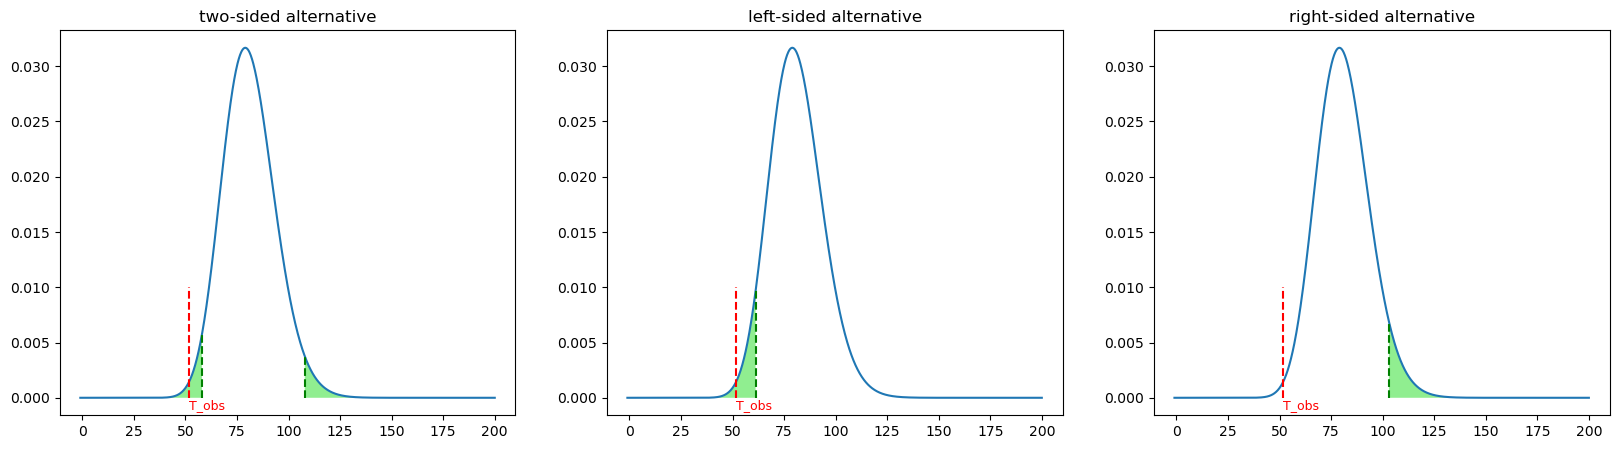

In [24]:
#Hypothesis testing: variance of normal population


def hyp_variance_chi2(data, variance_0, alpha):
    variance_ub = np.var(data, ddof = 1) #sample variance unbiased estimator
    n = len(data)
    
    T_obs = (n - 1) * variance_ub / variance_0
    df = n - 1

    p_value_lhs = stats.chi2.cdf(T_obs, df = df)
    p_value_rhs = 1 - stats.chi2.cdf(T_obs, df = df)
    
    crit_value_2s_lhs = stats.chi2.ppf(alpha/2, df = df) #two-sided alternative left
    crit_value_2s_rhs = stats.chi2.ppf(1 - alpha/2, df = df) #two-sided alternative right
    crit_value_lhs = stats.chi2.ppf(alpha, df = df)      #left-sided alternative
    crit_value_rhs = stats.chi2.ppf(1 - alpha, df = df)  #right-sided alternative

    x = np.linspace(-1, 200, 1000)
    y = stats.chi2.pdf(x, df)
    fig, ax = plt.subplots(1, 3, figsize = (20, 5))
    ax[0].set_title('two-sided alternative')
    ax[0].plot(x , y)
    ax[0].vlines(x = crit_value_2s_lhs, ymin = 0, ymax = stats.chi2.pdf(crit_value_2s_lhs, df = n - 1), linestyles = 'dashed', color = 'green')
    ax[0].vlines(x = crit_value_2s_rhs, ymin = 0, ymax = stats.chi2.pdf(crit_value_2s_rhs, df = n - 1), linestyles = 'dashed', color = 'green')
    ax[0].fill_between(x, 0, y, where=(np.array(x) > min(x)) & (np.array(x) <= crit_value_2s_lhs), facecolor='lightgreen')
    ax[0].fill_between(x, 0, y, where=(np.array(x) > crit_value_2s_rhs) & (np.array(x) <= max(x)), facecolor='lightgreen')
    ax[0].text(T_obs, -0.001, 'T_obs', fontsize = 9, color = 'red')
    ax[0].vlines(x = T_obs, ymin = 0, ymax = 0.01, linestyles = 'dashed', color = 'red')

    ax[1].set_title('left-sided alternative')
    ax[1].plot(x , y)
    ax[1].vlines(x = crit_value_lhs, ymin = 0, ymax = stats.chi2.pdf(crit_value_lhs, df = n - 1), linestyles = 'dashed', color = 'green')
    ax[1].fill_between(x, 0, y, where=(np.array(x) > min(x)) & (np.array(x) <= crit_value_lhs), facecolor='lightgreen')
    ax[1].text(T_obs, -0.001, 'T_obs', fontsize = 9, color = 'red')
    ax[1].vlines(x = T_obs, ymin = 0, ymax = 0.01, linestyles = 'dashed', color = 'red')

    ax[2].set_title('right-sided alternative')
    ax[2].plot(x , y)
    ax[2].vlines(x = crit_value_rhs, ymin = 0, ymax = stats.chi2.pdf(crit_value_rhs, df = n - 1), linestyles = 'dashed', color = 'green')
    ax[2].fill_between(x, 0, y, where=(np.array(x) > crit_value_rhs) & (np.array(x) <= max(x)), facecolor='lightgreen')
    ax[2].text(T_obs, -0.001, 'T_obs', fontsize = 9, color = 'red')
    ax[2].vlines(x = T_obs, ymin = 0, ymax = 0.01, linestyles = 'dashed', color = 'red')
              
    return print('H_0: sigma2 =', variance_0,
                 '\nObserved statistic', T_obs,
                 '\nH_A: sigma2 !=', variance_0,
                 '\ncrit_value_2s_lhs =', crit_value_2s_lhs,
                 '\ncrit_value_2s_rhs =', crit_value_2s_rhs,
                 '\nalpha/2 =', alpha/2,
                 '\np-value_2s_lhs =', round(p_value_lhs, 2),
                 '\np-value_2s_rhs =', round(p_value_rhs, 2),
                 '\nH_a: sigma2 <', variance_0,
                 '\ncrit_value_lhs =', crit_value_lhs,
                 '\nalpha =', alpha,
                 '\np-value =', round(p_value_lhs, 2),
                 '\nH_a: sigma2 >', variance_0,
                 '\ncrit_value_rhs =', crit_value_rhs,
                 '\nalpha =', alpha,
                 '\np-value =', round(p_value_rhs, 2))
                
hyp_variance_chi2(data.health_3q2022, 120000, 0.05)

H_0: sigma_x = sigma_y 
Observed statistic 0.630434953277205 
H_A: sigma_x != sigma_y 
crit_value_2s_lhs = 0.6923404722677363 
crit_value_2s_rhs = 1.444376054926467 
alpha/2 = 0.05 
p-value_lhs = 0.02 
p-value_rhs = 0.98 
H_a: sigma_x < sigma_y 
crit_value_lhs = 0.7511469583596881 
alpha = 0.1 
p-value = 0.02 
H_a: sigma_x > sigma_y 
crit_value_rhs = 1.33129740974222 
alpha = 0.1 
p-value = 0.98


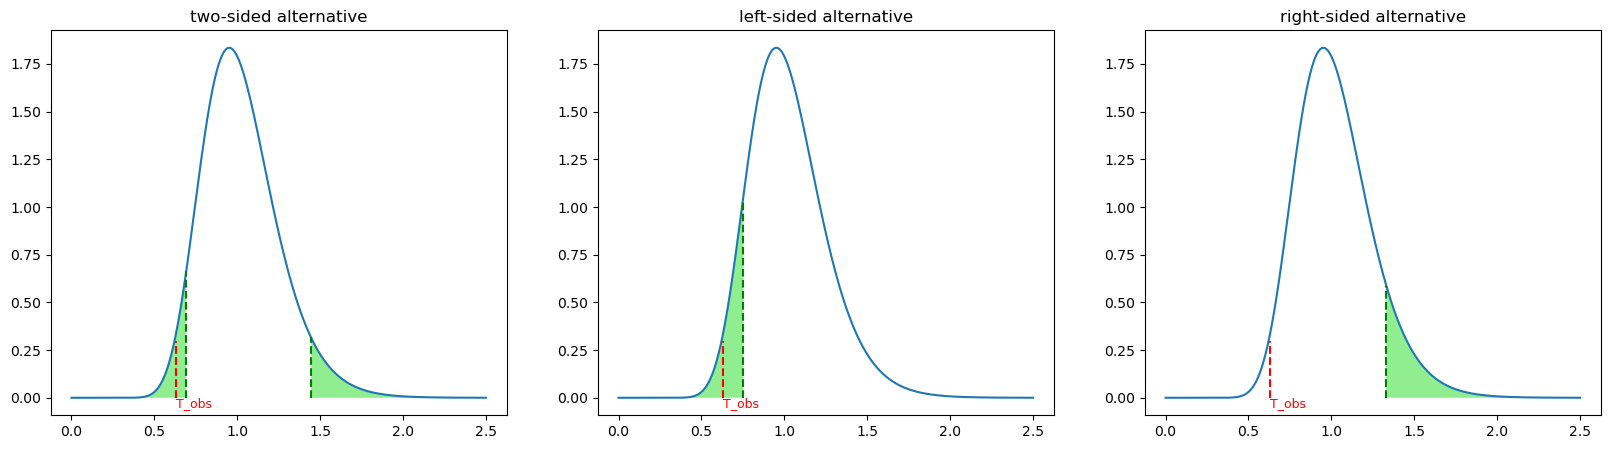

In [23]:
#Hypothesis testing: variance equality between two independent samples

#sigma_diff = sigma_x - sigma_y. 0 if sigma_x = sigma_y
#sigma_diff > 0 means that sigma_x > sigma_y
#sigma_diff < 0 mean that sigma_x < sigma_y

def hyp_eqvariance_uknown_mean(data_x, data_y, sigma_diff, alpha):
    
            # X sample
            variance_x = np.var(data_x, ddof = 1)
            n_x = len(data_x)
            dfn = n_x - 1
    
            # Y sample
            variance_y = np.var(data_y, ddof = 1)
            n_y = len(data_y)
            dfd = n_y -1
    
            T_obs = variance_x / variance_y
            
            p_value_lhs = stats.f.cdf(T_obs, dfn = n_x - 1, dfd = n_y - 1)
            p_value_rhs = 1 - stats.f.cdf(T_obs, dfn = n_x - 1, dfd = n_y - 1)
            
            crit_value_2s_lhs = stats.f.ppf(alpha/2, dfn = n_x - 1, dfd = n_y - 1) #two-sided alternative left
            crit_value_2s_rhs = stats.f.ppf(1 - alpha/2, dfn = n_x - 1, dfd = n_y - 1) #two-sided alternative right
            crit_value_lhs = stats.f.ppf(alpha, dfn = n_x - 1, dfd = n_y - 1)      #left-sided alternative
            crit_value_rhs = stats.f.ppf(1 - alpha, dfn = n_x - 1, dfd = n_y - 1)  #right-sided alternative   

            x = np.linspace(0, 2.5, 1000)
            y = stats.f.pdf(x, dfn, dfd)
            fig, ax = plt.subplots(1, 3, figsize = (20, 5))
            ax[0].set_title('two-sided alternative')
            ax[0].plot(x , y)
            ax[0].vlines(x = crit_value_2s_lhs, ymin = 0, ymax = stats.f.pdf(crit_value_2s_lhs, dfn, dfd), linestyles = 'dashed', color = 'green')
            ax[0].vlines(x = crit_value_2s_rhs, ymin = 0, ymax = stats.f.pdf(crit_value_2s_rhs, dfn, dfd), linestyles = 'dashed', color = 'green')
            ax[0].fill_between(x, 0, y, where=(np.array(x) > min(x)) & (np.array(x) <= crit_value_2s_lhs), facecolor='lightgreen')
            ax[0].fill_between(x, 0, y, where=(np.array(x) > crit_value_2s_rhs) & (np.array(x) <= max(x)), facecolor='lightgreen')
            ax[0].text(T_obs, -0.05, 'T_obs', fontsize = 9, color = 'red')
            ax[0].vlines(x = T_obs, ymin = 0, ymax = 0.3, linestyles = 'dashed', color = 'red')
        
            ax[1].set_title('left-sided alternative')
            ax[1].plot(x , y)
            ax[1].vlines(x = crit_value_lhs, ymin = 0, ymax = stats.f.pdf(crit_value_lhs, dfn, dfd), linestyles = 'dashed', color = 'green')
            ax[1].fill_between(x, 0, y, where=(np.array(x) > min(x)) & (np.array(x) <= crit_value_lhs), facecolor='lightgreen')
            ax[1].text(T_obs, -0.05, 'T_obs', fontsize = 9, color = 'red')
            ax[1].vlines(x = T_obs, ymin = 0, ymax = 0.3, linestyles = 'dashed', color = 'red')
        
            ax[2].set_title('right-sided alternative')
            ax[2].plot(x , y)
            ax[2].vlines(x = crit_value_rhs, ymin = 0, ymax = stats.f.pdf(crit_value_rhs, dfn, dfd), linestyles = 'dashed', color = 'green')
            ax[2].fill_between(x, 0, y, where=(np.array(x) > crit_value_rhs) & (np.array(x) <= max(x)), facecolor='lightgreen')
            ax[2].text(T_obs, -0.05, 'T_obs', fontsize = 9, color = 'red')
            ax[2].vlines(x = T_obs, ymin = 0, ymax = 0.3, linestyles = 'dashed', color = 'red')
   
            return print('H_0: sigma_x = sigma_y',
                 '\nObserved statistic', T_obs,
                 '\nH_A: sigma_x != sigma_y',
                 '\ncrit_value_2s_lhs =', crit_value_2s_lhs,
                 '\ncrit_value_2s_rhs =', crit_value_2s_rhs,
                 '\nalpha/2 =', alpha/2,
                 '\np-value_lhs =', round(p_value_lhs, 2),
                 '\np-value_rhs =', round(p_value_rhs, 2),
                 '\nH_a: sigma_x < sigma_y',
                 '\ncrit_value_lhs =', crit_value_lhs,
                 '\nalpha =', alpha,
                 '\np-value =', round(p_value_lhs, 2),
                 '\nH_a: sigma_x > sigma_y',
                 '\ncrit_value_rhs =', crit_value_rhs,
                 '\nalpha =', alpha,
                 '\np-value =', round(p_value_rhs, 2))

hyp_eqvariance_uknown_mean(data.health_3q2022, data.health_3q2023, 0, 0.1)